In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/system-identification-of-an-electric-motor/Dataset_Electric_Motor.csv


In [2]:
#import random
#n = 40963202 #number of records in file
#s = 100000 #desired sample size
#skip = sorted(random.sample(range(n),n-s))
#dataset = pd.read_csv('/kaggle/input/system-identification-of-an-electric-motor/Dataset_Electric_Motor.csv',skiprows=skip)
dataset = pd.read_csv('/kaggle/input/system-identification-of-an-electric-motor/Dataset_Electric_Motor.csv')
dataset.shape

(40963202, 7)

In [3]:
data = dataset.sample(frac=0.0025)
data.head()

,id_k,iq_k,epsilon_k,n_k,n_1k,id_k1,iq_k1
13729635,-45.82120,201.815400,-0.303381,7,4,-9.054881,265.84380
1868975,-133.98290,8.944014,2.495359,4,1,-95.989690,15.22347
21032944,-27.09096,45.719800,1.465365,5,1,-18.074920,35.51710
12286064,-87.80579,138.446900,-0.265523,3,2,-111.166000,162.91550
8097867,-174.81290,55.069030,-0.923959,6,7,-121.193100,50.07235


In [4]:
data.describe()

,id_k,iq_k,epsilon_k,n_k,n_1k,id_k1,iq_k1
count,102408.000000,102408.000000,102408.000000,102408.000000,102408.000000,102408.000000,102408.000000
mean,-99.244872,93.516435,0.020639,3.786677,3.764970,-98.402053,94.750325
std,61.210323,59.391036,1.808545,2.078319,2.079954,64.531872,61.689911
min,-239.996500,0.005444,-3.141541,1.000000,1.000000,-285.568700,-8.772841
25%,-146.506825,44.276645,-1.537190,2.000000,2.000000,-147.267400,44.297055
50%,-93.428605,86.213885,0.054723,4.000000,4.000000,-93.694210,86.756085
75%,-47.658220,138.680625,1.597995,6.000000,6.000000,-47.515600,139.211550
max,-0.000140,239.967800,3.141574,7.000000,7.000000,64.834080,328.511700


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
train_size=0.8

X = data.drop(columns = ['id_k1','iq_k1']).copy()
y = data['id_k1']

scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X),columns=['id_k','iq_k','epsilon_k','n_k','n_1k'])
X_train, X_rem, y_train, y_rem = train_test_split(X_scaled,y, train_size=0.8)

test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(81926, 5)
(81926,)
(10241, 5)
(10241,)
(10241, 5)
(10241,)


(None, None)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=1, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(units=100, activation='relu', input_shape=[5]),
    layers.Dropout(0.3),
    layers.Dense(units=100, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=1),
])

In [8]:
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['accuracy']
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping],
)

Epoch 1/50
161/161 [==============================] - 2s 9ms/step - loss: 98.4911 - accuracy: 0.0000e+00 - val_loss: 88.6326 - val_accuracy: 0.0000e+00
Epoch 2/50
161/161 [==============================] - 1s 6ms/step - loss: 88.4918 - accuracy: 0.0000e+00 - val_loss: 76.6269 - val_accuracy: 0.0000e+00
Epoch 3/50
161/161 [==============================] - 1s 6ms/step - loss: 65.6098 - accuracy: 0.0000e+00 - val_loss: 43.3825 - val_accuracy: 0.0000e+00
Epoch 4/50
161/161 [==============================] - 1s 6ms/step - loss: 37.1197 - accuracy: 0.0000e+00 - val_loss: 24.1460 - val_accuracy: 0.0000e+00
Epoch 5/50
161/161 [==============================] - 1s 6ms/step - loss: 23.4445 - accuracy: 0.0000e+00 - val_loss: 20.1668 - val_accuracy: 0.0000e+00
Epoch 6/50
161/161 [==============================] - 1s 6ms/step - loss: 19.0529 - accuracy: 0.0000e+00 - val_loss: 16.6497 - val_accuracy: 0.0000e+00
Epoch 7/50
161/161 [==============================] - 1s 6ms/step - loss: 16.8501 - accu

Minimum validation loss: 9.11644458770752


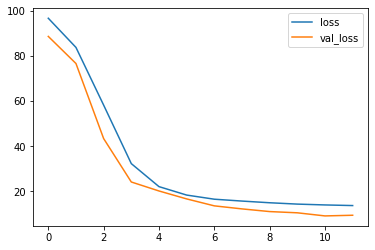

In [9]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
reg.predict(X_valid)
reg.score(X_valid, y_valid)

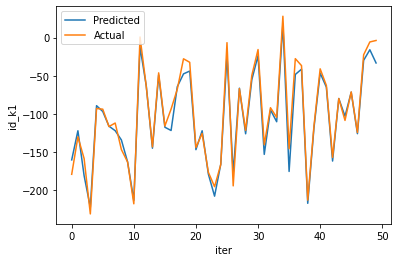

In [13]:
import matplotlib.pyplot as plt
sam = 50
x = range(0, sam)
y = model.predict(X_test[:sam])
def plot_id(x,y_pre,y_act):
    plt.plot(x, y_pre, label='Predicted')
    plt.plot(x, y_act, label='Actual')
    plt.xlabel('iter')
    plt.ylabel('id_k1')
    plt.legend()

plot_id(x,y,y_test[:sam])

In [16]:
from sklearn.metrics import mean_absolute_error
y = model.predict(X_test)
mae = mean_absolute_error(y_test, y)
print(mae)

9.225098370630468


Text(0, 0.5, 'id_k1_predicted')

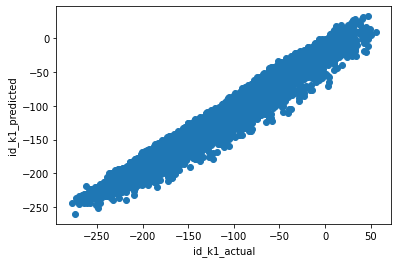

In [18]:
plt.scatter(y_test, y)
plt.xlabel('id_k1_actual')
plt.ylabel('id_k1_predicted')